In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
col_names = ['Age','JOB_admin.','JOB_blue-collar','JOB_entrepreneur','JOB_housemaid','JOB_management','JOB_retired','JOB_self-employed',
                'JOB_services','JOB_student','JOB_technician','JOB_unemployed','JOB_unknown','Marital_divorced','Marital_married','Marital_single',
                'Marital_unknown','Education_basic.4y','Education_basic.6y','Education_basic.9y','Education_high.school','Education_illiterate',
                'Education_professional.course','Education_university.degree','Education_unknown','Creditviolation_no','Creditviolation_unknown',
                'Creditviolation_yes','Mortgage_no','Mortgage_unknown','Mortgage_yes','Loan_no','Loan_unknown','Loan_yes','Contact',
                'Month_CPI_CCI_1','Month_CPI_CCI_2','Month_CPI_CCI_3','Month_CPI_CCI_4','Month_CPI_CCI_5','Month_CPI_CCI_6','Month_CPI_CCI_7',
                'Month_CPI_CCI_8','Month_CPI_CCI_9','Month_CPI_CCI_10','Month_CPI_CCI_11','Month_CPI_CCI_12','Month_CPI_CCI_13',
                'Month_CPI_CCI_14','Month_CPI_CCI_15','Month_CPI_CCI_16','Month_CPI_CCI_17','Month_CPI_CCI_18','Month_CPI_CCI_19',
                'Month_CPI_CCI_20','Month_CPI_CCI_21','Month_CPI_CCI_22','Month_CPI_CCI_23','Month_CPI_CCI_24','Month_CPI_CCI_25',
                'Month_CPI_CCI_26','DOW_mon','DOW_tue','DOW_wed','DOW_thu','DOW_fri','Duration','Campaign','Pdays_0','Pdays_1','Pdays_2',
                'Pdays_3','Pdays_4','Pdays_5','Pdays_6','Pdays_7','Pdays_8','Pdays_9','Pdays_10','Pdays_11','Pdays_12','Pdays_13','Pdays_14',
                'Pdays_15','Pdays_16','Pdays_17','Pdays_18','Pdays_19','Pdays_20','Pdays_21','Pdays_22','Pdays_25','Pdays_26','Pdays_27',
                'Pdays_999','Previous','Poutcome_failure','Poutcome_nonexistent','Poutcome_success','EVR','NE','Subscription','Y']
# load datasetSex
data = pd.read_csv("Bank_Normalization_New-v3.csv", header=None, names=col_names)

In [3]:
data.head()

,Age,JOB_admin.,JOB_blue-collar,JOB_entrepreneur,JOB_housemaid,JOB_management,JOB_retired,JOB_self-employed,JOB_services,JOB_student,...,Pdays_27,Pdays_999,Previous,Poutcome_failure,Poutcome_nonexistent,Poutcome_success,EVR,NE,Subscription,Y
0,0.271605,0,0,0,0,0,0,1,0,0,...,0,1,0.0,0,1,0,0.9375,0.859735,0,4.857
1,0.469136,0,0,0,0,0,0,0,0,0,...,0,1,0.0,0,1,0,0.9375,0.859735,0,4.857
2,0.395062,0,0,1,0,0,0,0,0,0,...,0,1,0.0,0,1,0,0.9375,0.859735,1,4.857
3,0.506173,0,0,0,0,0,0,0,0,0,...,0,1,0.0,0,1,0,0.9375,0.859735,0,4.857
4,0.345679,0,1,0,0,0,0,0,0,0,...,0,1,0.0,0,1,0,0.9375,0.859735,1,4.857


In [4]:
from tkinter import Y
feature_cols = ['Age','JOB_admin.','JOB_blue-collar','JOB_entrepreneur','JOB_housemaid','JOB_management','JOB_retired','JOB_self-employed',
                'JOB_services','JOB_student','JOB_technician','JOB_unemployed','JOB_unknown','Marital_divorced','Marital_married','Marital_single',
                'Marital_unknown','Education_basic.4y','Education_basic.6y','Education_basic.9y','Education_high.school','Education_illiterate',
                'Education_professional.course','Education_university.degree','Education_unknown','Creditviolation_no','Creditviolation_unknown',
                'Creditviolation_yes','Mortgage_no','Mortgage_unknown','Mortgage_yes','Loan_no','Loan_unknown','Loan_yes','Contact',
                'Month_CPI_CCI_1','Month_CPI_CCI_2','Month_CPI_CCI_3','Month_CPI_CCI_4','Month_CPI_CCI_5','Month_CPI_CCI_6','Month_CPI_CCI_7',
                'Month_CPI_CCI_8','Month_CPI_CCI_9','Month_CPI_CCI_10','Month_CPI_CCI_11','Month_CPI_CCI_12','Month_CPI_CCI_13',
                'Month_CPI_CCI_14','Month_CPI_CCI_15','Month_CPI_CCI_16','Month_CPI_CCI_17','Month_CPI_CCI_18','Month_CPI_CCI_19',
                'Month_CPI_CCI_20','Month_CPI_CCI_21','Month_CPI_CCI_22','Month_CPI_CCI_23','Month_CPI_CCI_24','Month_CPI_CCI_25',
                'Month_CPI_CCI_26','DOW_mon','DOW_tue','DOW_wed','DOW_thu','DOW_fri','Duration','Campaign','Pdays_0','Pdays_1','Pdays_2',
                'Pdays_3','Pdays_4','Pdays_5','Pdays_6','Pdays_7','Pdays_8','Pdays_9','Pdays_10','Pdays_11','Pdays_12','Pdays_13','Pdays_14',
                'Pdays_15','Pdays_16','Pdays_17','Pdays_18','Pdays_19','Pdays_20','Pdays_21','Pdays_22','Pdays_25','Pdays_26','Pdays_27',
                'Pdays_999','Previous','Poutcome_failure','Poutcome_nonexistent','Poutcome_success','EVR','NE','Subscription','Y']
X = data[feature_cols] # Features
y = data.Y # Target variable
y

0        4.857
1        4.857
2        4.857
3        4.857
4        4.857
         ...  
41183    1.028
41184    1.028
41185    1.028
41186    1.028
41187    1.028
Name: Y, Length: 41188, dtype: float64

In [5]:
data2 = preprocessing.normalize(data, norm= 'l2')
scaler = MinMaxScaler()
data3 = scaler.fit(data)
data3 = scaler.transform(data)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
X_train.shape

(28831, 103)

In [8]:
xgbc = XGBRegressor(n_estimators=200)
xgbc.fit(X_train, y_train)
y_pred_xgb = xgbc.predict(X_test)
print("MAE:",mean_absolute_error(y_test,y_pred_xgb))
print("RMSE : %.4g" % mean_squared_error(y_test, y_pred_xgb,squared=False))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred_xgb))

MAE: 0.00016321283260034306
RMSE : 0.002156
MAPE: 0.00010237528198354835


In [9]:
print(xgbc.score(X_train,y_train))
print(xgbc.score(X_test, y_test))

0.999999962000224
0.9999984486489452


score_array [0.9999999888318986, 0.9999999888318986, 0.9999999888318986, 0.9999999888318986, 0.9999999888318986, 0.9999999888318986, 0.9999999888318986, 0.9999999888318986, 0.9999999888318986, 0.9999999888318986, 0.9999999888318986, 0.9999999888318986, 0.9999999888318986, 0.9999999888318986, 0.9999999888318986, 0.9999999888318986, 0.9999999888318986, 0.9999999888318986, 0.9999999888318986]
 
score_array_MAX: 0.9999999888318986
----------------------------------------------------------------------------------------------------------
score_array_test [0.9999982724260068, 0.9999982724260068, 0.9999982724260068, 0.9999982724260068, 0.9999982724260068, 0.9999982724260068, 0.9999982724260068, 0.9999982724260068, 0.9999982724260068, 0.9999982724260068, 0.9999982724260068, 0.9999982724260068, 0.9999982724260068, 0.9999982724260068, 0.9999982724260068, 0.9999982724260068, 0.9999982724260068, 0.9999982724260068, 0.9999982724260068]
 
score_array_test_MAX: 0.9999982724260068


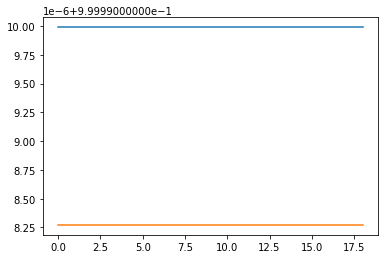

In [12]:
score_array= []
score_array_test= []
for i in range(1,20):   
    y_pred_svr = XGBRegressor()
    y_pred_svr.fit(X_train, y_train)
    score_val = y_pred_svr.score(X_train, y_train)
    score_test = y_pred_svr.score(X_test, y_test)
    score_array.append(score_val)
    score_array_test.append(score_test)

print("score_array",score_array)
print(" ")
print("score_array_MAX:", np.max(score_array))
print("----------------------------------------------------------------------------------------------------------")
print("score_array_test", score_array_test)
print(" ")
print("score_array_test_MAX:", np.max(score_array_test))
plt.plot(score_array)
plt.plot(score_array_test)